In [1]:
import numpy as np
from glob import glob
import cv2, os, random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
path='dogs-vs-cats/train'

In [12]:
## used for resize and in our model
ROW, COL = 96, 96

dogs, cats = [], []
y_dogs, y_cats = [], []

In [13]:
dog_path = os.path.join(path, 'dog.5*')
len(glob(dog_path))

1111

In [14]:
## Load some our dog images (1,111 개 이미지)
dog_path = os.path.join(path, 'dog.5*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [15]:

## Load some our cat images (1,111 개 이미지)
cat_path = os.path.join(path, 'cat.5*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [16]:
classes = ['dog', 'cat']

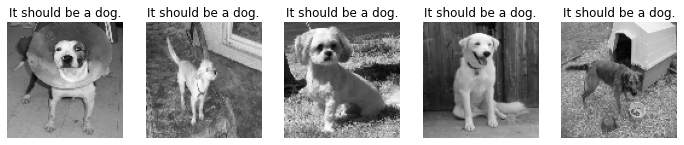

In [17]:
#from PIL import Image

plt.figure(figsize=(12,8))    
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[0]))        
plt.show()

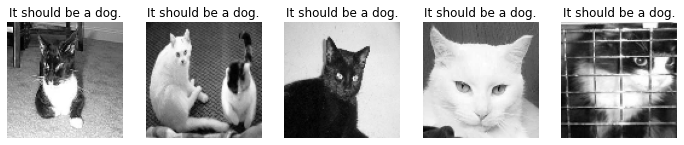

In [18]:
#from PIL import Image

plt.figure(figsize=(12,8))    
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[0]))        
plt.show()

In [19]:
## just change the labels for 0 and  1
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [20]:
## converting everything to Numpy array to fit in our model
## them creating a X and target file like we used to see
## in Machine and Deep Learning models
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [21]:
X = np.concatenate((dogs,cats), axis=0)
y = np.concatenate((y_dogs, y_cats), axis=0)

# not encoding
_y = np.concatenate((y_dogs, y_cats), axis=0)

In [22]:
len(X)

2222

In [23]:
## One-Hot Encoding



# y = tf.keras.utils.to_categorical(y, 2)



In [24]:

## Here is our model as a CNN
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, 1), 
           activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    #Dense(2, activation='softmax')
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0

In [28]:
# model.compile(loss='categorical_crossentropy', 
#               optimizer=Adam(), metrics=['accuracy'])

model.compile(loss='binary_crossentropy', 
              optimizer=Adam(), metrics=['accuracy'])

In [29]:
## to save checkpoint to use later
modelpath = "model/dogs_vs_cats-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
#early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [30]:
# model.fit(X, y, batch_size=32, epochs=40, validation_split=0.2,
#           callbacks=[checkpointer, early_stopping_callback])

model.fit(X, _y, batch_size=32, epochs=40, validation_split=0.2)
          #,callbacks=[checkpointer, early_stopping_callback])

Train on 1777 samples, validate on 445 samples
Epoch 1/40
1777/1777 [==============================] - 27s 15ms/sample - loss: 0.7242 - accuracy: 0.6213 - val_loss: 1.1204 - val_accuracy: 0.0000e+00
Epoch 2/40
1777/1777 [==============================] - 27s 15ms/sample - loss: 0.6624 - accuracy: 0.6258 - val_loss: 0.7312 - val_accuracy: 0.2517
Epoch 3/40
1777/1777 [==============================] - 27s 15ms/sample - loss: 0.6434 - accuracy: 0.6488 - val_loss: 0.9741 - val_accuracy: 0.1416
Epoch 4/40
1777/1777 [==============================] - 27s 15ms/sample - loss: 0.6337 - accuracy: 0.6550 - val_loss: 0.7283 - val_accuracy: 0.3348
Epoch 5/40
1777/1777 [==============================] - 27s 15ms/sample - loss: 0.6332 - accuracy: 0.6607 - val_loss: 1.0677 - val_accuracy: 0.1461
Epoch 6/40
1777/1777 [==============================] - 27s 15ms/sample - loss: 0.6233 - accuracy: 0.6719 - val_loss: 0.9387 - val_accuracy: 0.1236
Epoch 7/40
1777/1777 [==============================] - 27s 1

In [27]:
from tensorflow.keras.models import load_model
del model
model = load_model('model/dogs_vs_cats-cnn-07-0.7768.hdf5')

In [28]:
scores = model.evaluate(X, y, verbose=2)
print('MODEL ACCURACY: %.5f' % scores[1])

2222/2222 - 6s - loss: 0.6186 - accuracy: 0.6301
MODEL ACCURACY: 0.63006
